In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()

In [39]:
hr = pd.read_excel('C:/Users/milena/Dropbox/TPC Heavy Residue/TPC_final_list_DENSITY_421.xlsx')

In [40]:
hr_combo=pd.read_excel('C:/Users/milena/Dropbox/TPC Heavy Residue/TPC_final_list_DENSITY.xlsx')

In [41]:
presence=pd.read_excel('C:/Users/milena/Dropbox/TPC Heavy Residue/TPC_final_list_PRESENCE.xlsx')

In [42]:
weights = pd.read_excel('TPC_FINAL_RealWeightsAll.xlsx')

### 1 Basic Overview

In [43]:
hr.shape

(500, 58)

In [44]:
hr.nunique()

Year                        7
Area                        2
Grid_X                    380
Grid_Y                    387
Priority_Unit               2
TimePeriod                  1
Discussion                489
Unit                      494
DataCategory                6
GeneralCategory             8
Context                     6
InterpretativeCategory    290
Feature                   158
Space                      34
Building                    9
Trench                      4
Level                       5
GID                       499
FlotVolume                 68
DateSorted                 42
Comments                   25
SortedBy                    6
Problematical               1
MergedFlot                  2
4mmBeads                   63
4mmBone                   490
ClayBall                    7
ClayFigurine               14
ClayObject                 26
ClayShaped                  8
4mmEggshell               126
4mmFlint                   45
4mmMollusc                211
4mmObsidia

In [45]:
hr.FlotVolume.sum()

10287.3

There are 500 samples from 495 units. In total 10287.3 litres of soil were floated.

In [46]:
samples= hr.Context.value_counts()

In [47]:
samples = pd.DataFrame(samples)

In [48]:
samples.sort_values('Context')

,Context
activity,10
midden,13
burial fill,24
floor (use),27
fill,182
construction,244


The majority of samples come from fill and construction units.

### 2 Real Weights

In [50]:
weights['TotalWeight']= weights['4Weight'] + weights['2Weight'] + weights['1Weight']

In [51]:
weights

,Unit,Material,DataCategory,GeneralCategory,InterpretativeCategory,4Weight,2Weight,1Weight,Context,TotalWeight
0,20719,Bone,activity,activity,firespot infill F.8290,1.140000,0.00,0.00,activity,1.140000
1,20719,Bone diagnostic,activity,activity,firespot infill F.8290,0.000000,0.07,0.02,activity,0.090000
2,20719,Mollusc,activity,activity,firespot infill F.8290,0.000000,0.02,0.08,activity,0.100000
3,20719,Obsidian,activity,activity,firespot infill F.8290,0.350000,0.00,0.00,activity,0.350000
4,20719,Stone,activity,activity,firespot infill F.8290,0.490000,0.00,0.00,activity,0.490000
...,...,...,...,...,...,...,...,...,...,...
3772,31854,Eggshell,midden,midden,midden,0.310000,0.20,0.05,midden,0.560000
3773,31854,Obsidian,midden,midden,midden,10.400000,0.20,0.02,midden,10.620000
3774,31854,Plant,midden,midden,midden,1.800000,0.74,0.56,midden,3.100000
3775,31854,Pottery,midden,midden,midden,16.299999,0.00,0.00,midden,16.299999


In [52]:
weights2 = weights.groupby(['Context','Material'])['TotalWeight'].sum().reset_index()

In [53]:
weights3 = weights2.groupby('Material')['TotalWeight'].sum().reset_index()

In [54]:
realweights = weights3.sort_values('TotalWeight')

In [55]:
realweights.TotalWeight = realweights.TotalWeight.fillna(0)

In [56]:
realweights

,Material,TotalWeight
8,Metal,0.190000
11,Pigment,0.280000
16,Worked Bone,6.970000
3,Clay Ball,38.331001
0,Beads,53.330000
6,Eggshell,55.650000
14,Shaped Clay,117.710004
4,Clay Figurines,184.139999
7,Flint,260.517002
5,Clay Object,260.970003


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17]),
 <a list of 18 Text xticklabel objects>)

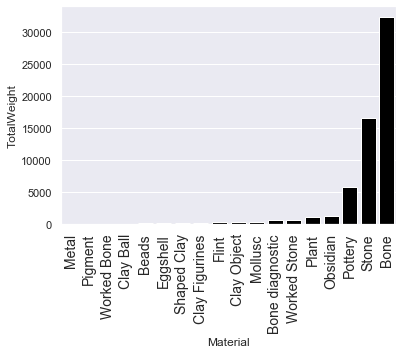

In [57]:
sns.barplot(realweights.Material, realweights.TotalWeight, color='black')
plt.xticks(rotation=90, size=14)


Over 30 kg of Animal Bone, 15 kg of Stone (though not all Stone was weighed!), 5kg of Pottery, 1 kg of Plant and Obsidian were retrieved from these samples. 
Other materials exist in much smaller quantitites 

### 3 Presence

In [88]:
presence['count_of_units']=1

#### 3.1. Presence of Materials in All Contexts

In [135]:
presence_all= presence.drop(columns=['Year', 'Area', 'Grid_X', 'Grid_Y', 'Priority_Unit', 'TimePeriod',
       'Discussion', 'Unit', 'DataCategory', 'GeneralCategory', 'Context',
       'InterpretativeCategory', 'Feature', 'Space', 'Building', 'Trench',
       'Level', 'GID', 'FlotVolume', 'DateSorted', 'Comments', 'SortedBy',
       'Problematical', 'MergedFlot'])


presence_all =presence_all.sum()
presence_all=presence_all.reset_index()
presence_all.columns=['Material','Count']

In [153]:
presence_all['Presence'] = presence_all['Count']*100/500
presence_all=presence_all.sort_values('Presence',ascending=False)
presence_all=presence_all.loc[presence_all.Material!='count_of_units']

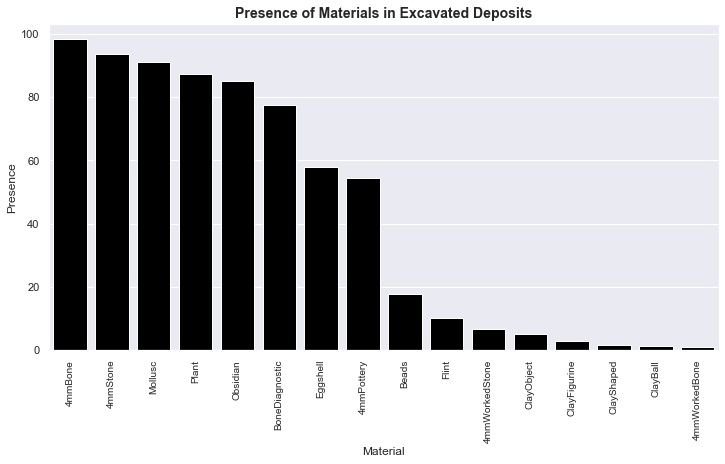

In [165]:
#plotting Presence in all contexts

fig, ax = plt.subplots(figsize=(12,6))
sns.barplot(presence_all.Material, presence_all.Presence, color='black')
plt.xticks(rotation=90, size=10);
ax.set_title("Presence of Materials in Excavated Deposits",size =14, fontweight='bold');

#### 3.2. Presence of Materials in Different Context Types

In [89]:
presence2 = presence[['Context','Beads', '4mmBone', 'BoneDiagnostic',
       'ClayBall', 'ClayFigurine', 'ClayObject', 'ClayShaped', 'Eggshell',
       'Flint', 'Mollusc', 'Obsidian', 'Plant', '4mmPottery', '4mmStone',
       '4mmWorkedBone', '4mmWorkedStone','count_of_units']]

In [90]:
presence2

,Context,Beads,4mmBone,BoneDiagnostic,ClayBall,ClayFigurine,ClayObject,ClayShaped,Eggshell,Flint,Mollusc,Obsidian,Plant,4mmPottery,4mmStone,4mmWorkedBone,4mmWorkedStone,count_of_units
0,fill,0,1,1,0,0,0,0,1,0,1,1,1,1,1,0,1,1
1,midden,1,1,1,0,1,0,1,1,0,1,1,1,1,1,0,1,1
2,fill,0,1,1,0,0,0,0,1,0,1,1,1,1,1,0,1,1
3,fill,0,1,1,0,0,0,0,1,0,1,1,1,1,1,0,1,1
4,fill,1,1,1,0,0,0,0,1,0,1,1,1,1,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,construction,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1
496,construction,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
497,fill,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1
498,construction,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [96]:
presence3 =presence2.groupby('Context').sum().reset_index()

In [104]:
presence3['Beads%']=round(presence3['Beads'] *100/presence3['count_of_units'],2)
presence3['4mmBone%']=round(presence3['4mmBone'] *100/presence3['count_of_units'],2)
presence3['ClayBall%']=round(presence3['ClayBall'] *100/presence3['count_of_units'],2)
presence3['ClayFigurine%']=round(presence3['ClayFigurine'] *100/presence3['count_of_units'],2)
presence3['ClayObject%']=round(presence3['ClayObject'] *100/presence3['count_of_units'],2)
presence3['ClayShaped%']=round(presence3['ClayShaped'] *100/presence3['count_of_units'],2)
presence3['Eggshell%']=round(presence3['Eggshell'] *100/presence3['count_of_units'],2)
presence3['Flint%']=round(presence3['Flint'] *100/presence3['count_of_units'],2)
presence3['Mollusc%']=round(presence3['Mollusc'] *100/presence3['count_of_units'],2)
presence3['Obsidian%']=round(presence3['Obsidian'] *100/presence3['count_of_units'],2)
presence3['Plant%']=round(presence3['Plant'] *100/presence3['count_of_units'],2)
presence3['4mmPottery%']=round(presence3['4mmPottery'] *100/presence3['count_of_units'],2)
presence3['4mmStone%']=round(presence3['4mmStone'] *100/presence3['count_of_units'],2)
presence3['4mmWorkedBone%']=round(presence3['4mmWorkedBone'] *100/presence3['count_of_units'],2)
presence3['4mmWorkedStone%']=round(presence3['4mmWorkedStone'] *100/presence3['count_of_units'],2)

In [108]:
presence3 = presence3.drop(columns=['Beads', '4mmBone', 'BoneDiagnostic', 'ClayBall',
       'ClayFigurine', 'ClayObject', 'ClayShaped', 'Eggshell', 'Flint',
       'Mollusc', 'Obsidian', 'Plant', '4mmPottery', '4mmStone',
       '4mmWorkedBone', '4mmWorkedStone', 'count_of_units'])

In [109]:
presence3

,Context,Beads%,4mmBone%,ClayBall%,ClayFigurine%,ClayObject%,ClayShaped%,Eggshell%,Flint%,Mollusc%,Obsidian%,Plant%,4mmPottery%,4mmStone%,4mmWorkedBone%,4mmWorkedStone%
0,activity,0.00,100.00,10.00,0.00,0.00,0.00,30.00,0.00,80.00,80.00,70.00,30.00,100.00,0.00,0.00
1,burial fill,66.67,100.00,0.00,4.17,12.50,0.00,79.17,25.00,100.00,95.83,91.67,70.83,100.00,0.00,8.33
2,construction,9.43,97.54,1.23,2.46,2.87,1.23,47.95,7.79,91.80,75.41,85.66,40.16,93.44,0.82,4.10
3,fill,21.43,99.45,1.10,2.20,7.69,1.65,68.68,11.54,90.11,93.96,89.56,70.88,92.86,1.10,8.79
4,floor (use),14.81,92.59,0.00,0.00,0.00,0.00,55.56,11.11,92.59,96.30,85.19,48.15,92.59,0.00,11.11
5,midden,46.15,100.00,7.69,23.08,15.38,15.38,76.92,15.38,84.62,100.00,100.00,92.31,92.31,7.69,15.38


In [110]:
presence3.columns

Index(['Context', 'Beads%', '4mmBone%', 'ClayBall%', 'ClayFigurine%',
       'ClayObject%', 'ClayShaped%', 'Eggshell%', 'Flint%', 'Mollusc%',
       'Obsidian%', 'Plant%', '4mmPottery%', '4mmStone%', '4mmWorkedBone%',
       '4mmWorkedStone%'],
      dtype='object')

In [117]:
hr_presence = presence3.melt(id_vars = 'Context',
                   var_name  = 'Material',
                   value_name = 'Density')

In [158]:
hr_presence = hr_presence.sort_values('Density', ascending=False)

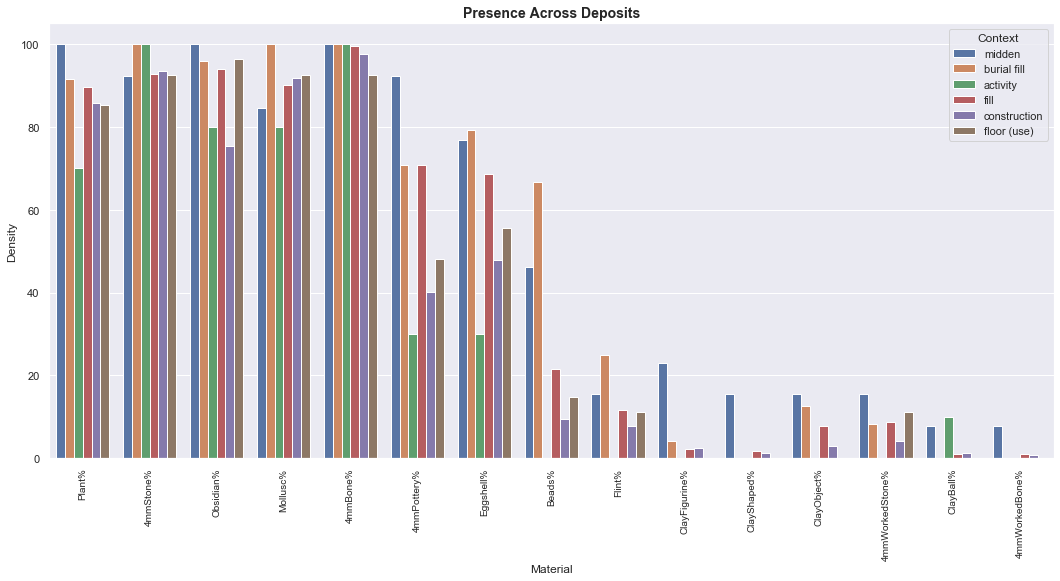

In [164]:
fig, ax = plt.subplots(figsize=(18,8))
sns.barplot(hr_presence.Material, hr_presence.Density, hue=hr_presence.Context)
plt.xticks(rotation=90, size=10);
ax.set_title("Presence Across Deposits",size =14, fontweight='bold');

### Correlation of Densities

In [58]:
hr.columns

Index(['Year', 'Area', 'Grid_X', 'Grid_Y', 'Priority_Unit', 'TimePeriod',
       'Discussion', 'Unit', 'DataCategory', 'GeneralCategory', 'Context',
       'InterpretativeCategory', 'Feature', 'Space', 'Building', 'Trench',
       'Level', 'GID', 'FlotVolume', 'DateSorted', 'Comments', 'SortedBy',
       'Problematical', 'MergedFlot', '4mmBeads', '4mmBone', 'ClayBall',
       'ClayFigurine', 'ClayObject', 'ClayShaped', '4mmEggshell', '4mmFlint',
       '4mmMollusc', '4mmObsidian', '4mmPlant', '4mmPottery', '4mmStone',
       '4mmWorkedBone', '4mmWorkedStone', '2mmBeads', '2mmBoneCHECK',
       '2mmBoneDiagnostic', '2mmEggshell', '2mmFlint', '2mmMollusc',
       '2mmObsidian', '2mmPlant', '1mmBeads', '1mmBoneCHECK',
       '1mmBoneDiagnostic', '1mmEggshell', '1mmFlint', '1mmMollusc',
       '1mmObsidian', '1mmPlant', 'TOBECHECKEDMV', 'statusofchecking',
       'FINAL'],
      dtype='object')

In [59]:
densities = hr[['4mmBeads', '4mmBone', 'ClayBall','ClayFigurine', 'ClayObject', 'ClayShaped', 
                '4mmEggshell', '4mmFlint','4mmMollusc', '4mmObsidian', '4mmPlant', '4mmPottery',
                '4mmWorkedBone','4mmWorkedStone', '2mmBeads','2mmBoneDiagnostic', '2mmEggshell',
                '2mmFlint', '2mmMollusc','2mmObsidian', '2mmPlant', '1mmBeads','1mmBoneDiagnostic',
                '1mmEggshell', '1mmFlint', '1mmMollusc','1mmObsidian', '1mmPlant']]

In [60]:
densities['Beads'] =densities['4mmBeads']+ densities['2mmBeads'] + densities['1mmBeads']
densities['Eggshell'] =densities['4mmEggshell']+ densities['2mmEggshell'] + densities['1mmEggshell']
densities['Flint'] =densities['4mmFlint']+ densities['2mmFlint'] + densities['1mmFlint']
densities['Mollusc'] =densities['4mmMollusc']+ densities['2mmMollusc'] + densities['1mmMollusc']
densities['Obsidian'] =densities['4mmObsidian']+ densities['2mmObsidian'] + densities['1mmObsidian']
densities['Plant'] =densities['4mmPlant']+ densities['2mmPlant'] + densities['1mmPlant']
densities['BoneDiagnostic'] =densities['2mmBoneDiagnostic']+ densities['1mmBoneDiagnostic']


<ipython-input-60-ffa8a2ac26ab>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  densities['Beads'] =densities['4mmBeads']+ densities['2mmBeads'] + densities['1mmBeads']
<ipython-input-60-ffa8a2ac26ab>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  densities['Eggshell'] =densities['4mmEggshell']+ densities['2mmEggshell'] + densities['1mmEggshell']
<ipython-input-60-ffa8a2ac26ab>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_in

In [61]:
densities.columns

Index(['4mmBeads', '4mmBone', 'ClayBall', 'ClayFigurine', 'ClayObject',
       'ClayShaped', '4mmEggshell', '4mmFlint', '4mmMollusc', '4mmObsidian',
       '4mmPlant', '4mmPottery', '4mmWorkedBone', '4mmWorkedStone', '2mmBeads',
       '2mmBoneDiagnostic', '2mmEggshell', '2mmFlint', '2mmMollusc',
       '2mmObsidian', '2mmPlant', '1mmBeads', '1mmBoneDiagnostic',
       '1mmEggshell', '1mmFlint', '1mmMollusc', '1mmObsidian', '1mmPlant',
       'Beads', 'Eggshell', 'Flint', 'Mollusc', 'Obsidian', 'Plant',
       'BoneDiagnostic'],
      dtype='object')

In [62]:
densities = densities[['4mmBone', 'ClayBall', 'ClayFigurine', 'ClayObject',
       'ClayShaped','4mmPottery','Beads', 'Eggshell', 'Flint', 'Mollusc', 'Obsidian', 'Plant',
       'BoneDiagnostic']]

In [63]:
densities=densities.fillna(0)

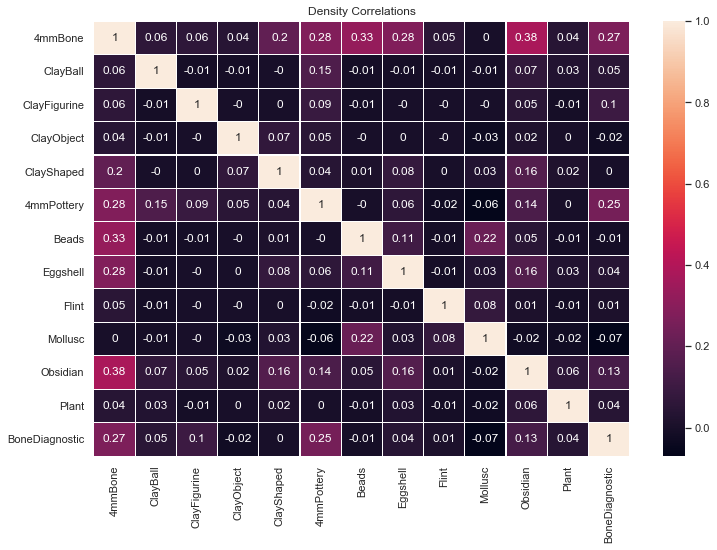

In [64]:
fig, ax = plt.subplots(figsize=(12,8))

sns.heatmap(round(densities.corr(),2),
            annot=True,
            linewidth=.1,
            vmax=1,);

ax.set_title("Density Correlations");

There are no strong correlations in the densities. 

Moderate positive correlations: Bone and Obsidian, Bone and Beads.

Other correlations are weak or non-existing. 

### Distribution of Densities

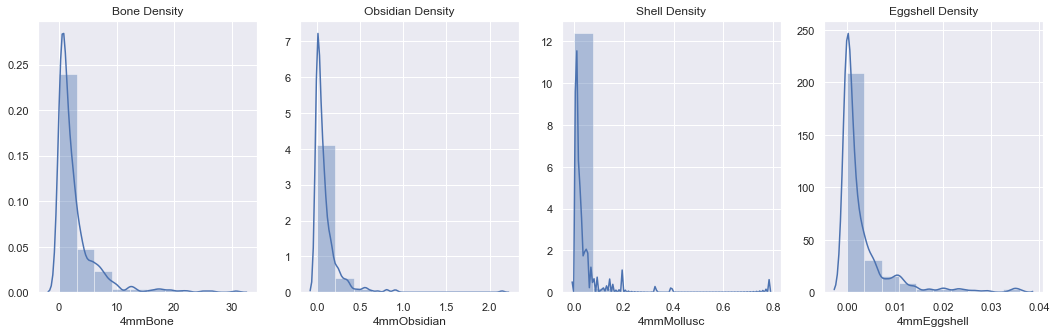

In [65]:
fig, ax = plt.subplots(nrows=1,
                       ncols=4,
                       figsize=(18,5))

sns.distplot(hr['4mmBone'], bins=10, ax=ax[0])
ax[0].set_title("Bone Density");

sns.distplot(hr['4mmObsidian'], bins=10, ax=ax[1])
ax[1].set_title("Obsidian Density");

sns.distplot(hr['4mmMollusc'], bins=10, ax=ax[2])
ax[2].set_title("Shell Density");

sns.distplot(hr['4mmEggshell'], bins=10, ax=ax[3])
ax[3].set_title("Eggshell Density");

### Log10 Densities

In [66]:
hr_density_overview=hr.copy()

In [67]:
# Log10 Densities

In [68]:
cols = ['Year', 'Area', 'Grid_X', 'Grid_Y', 'Priority_Unit', 'TimePeriod',
       'Discussion', 'Unit', 'DataCategory', 'GeneralCategory', 'Context',
       'InterpretativeCategory', 'Feature', 'Space', 'Building', 'Trench',
       'Level', 'GID', 'FlotVolume', 'DateSorted', 'Comments', 'SortedBy',
       'Problematical', 'MergedFlot','TOBECHECKEDMV', 'statusofchecking',
       'FINAL']

In [69]:
hr_density_overview2 = hr_density_overview.melt(id_vars = cols,
                   var_name  = 'Material',
                   value_name = 'Density')

In [70]:
#dropping rows where frequency is 0. 
hr_density_overview2 = hr_density_overview2[hr_density_overview2['Density'] !=0] 

#creating a column with log10 transformation. 
hr_density_overview2['log10_Density'] = round(np.log10(hr_density_overview2['Density']),2)


### Density of ubiqutous material in different contexts

### Differences in the distribution of material amongst fractions

In [71]:
# extracting 4mm ubiqutous materials
bone = hr_density_overview2.loc[hr_density_overview2.Material=='4mmBone']
obsidian = hr_density_overview2.loc[hr_density_overview2.Material=='4mmObsidian']
shell= hr_density_overview2.loc[hr_density_overview2.Material=='4mmMollusc']
eggshell= hr_density_overview2.loc[hr_density_overview2.Material=='4mmEggshell']
pottery= hr_density_overview2.loc[hr_density_overview2.Material=='4mmPottery']

In [72]:
# extracting 2mm and 1mm ubiqutous materials
bone_diagnostic_2 = hr_density_overview2.loc[hr_density_overview2.Material=='2mmBoneDiagnostic']
obsidian2 = hr_density_overview2.loc[hr_density_overview2.Material=='2mmObsidian']
shell2= hr_density_overview2.loc[hr_density_overview2.Material=='2mmMollusc']
eggshell2= hr_density_overview2.loc[hr_density_overview2.Material=='2mmEggshell']


bone_diagnostic_1 = hr_density_overview2.loc[hr_density_overview2.Material=='1mmBoneDiagnostic']
obsidian1 = hr_density_overview2.loc[hr_density_overview2.Material=='1mmObsidian']
shell1= hr_density_overview2.loc[hr_density_overview2.Material=='1mmMollusc']
eggshell1= hr_density_overview2.loc[hr_density_overview2.Material=='1mmEggshell']

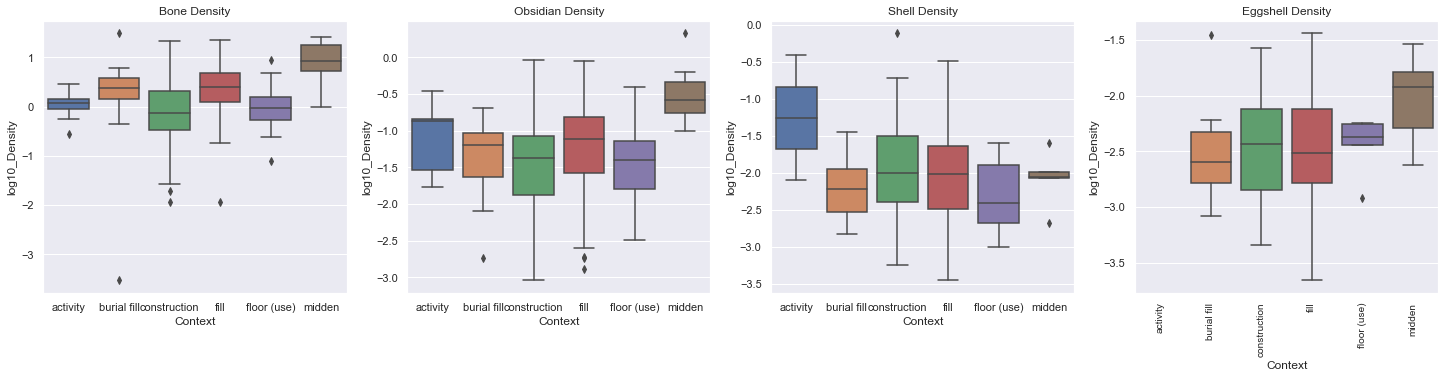

In [73]:
# Plotting densities of 4mm ubiqutous materials


fig, ax = plt.subplots(nrows=1,
                       ncols=4,
                       figsize=(25,5))

sns.boxplot(bone.Context, bone.log10_Density, ax=ax[0])
plt.xticks(rotation=90, size=10)
ax[0].set_title("Bone Density");

sns.boxplot(obsidian.Context, obsidian.log10_Density, ax=ax[1])
ax[1].set_title("Obsidian Density");
plt.xticks(rotation=90, size=10)

sns.boxplot(shell.Context, shell.log10_Density, ax=ax[2])
ax[2].set_title("Shell Density");
plt.xticks(rotation=90, size=10)

sns.boxplot(eggshell.Context, eggshell.log10_Density, ax=ax[3])
ax[3].set_title("Eggshell Density");



Middens have the highest density of all 4mm ubiqitous materials except Shell, which is at the lowest in middens, and by far the highest in activity deposits. 

After middens , Burial fills and other fills show the highest density of Bone, but this is not necessarily the case wiht other materials. For example, Eggshell has the highest density (apart from middens) in floor deposits. 



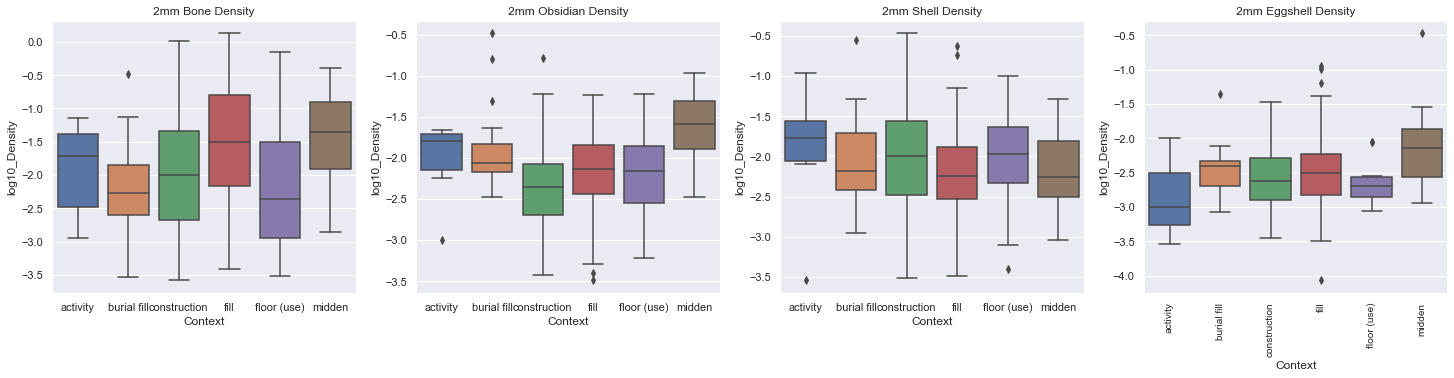

In [74]:
# Plotting densities of 2mm ubiqutous materials

fig, ax = plt.subplots(nrows=1,
                       ncols=4,
                       figsize=(25,5))

sns.boxplot(bone_diagnostic_2.Context, bone_diagnostic_2.log10_Density, ax=ax[0])
plt.xticks(rotation=90, size=10)
ax[0].set_title("2mm Bone Density");

sns.boxplot(obsidian2.Context, obsidian2.log10_Density, ax=ax[1])
ax[1].set_title("2mm Obsidian Density");
plt.xticks(rotation=90, size=10)

sns.boxplot(shell2.Context, shell2.log10_Density, ax=ax[2])
ax[2].set_title("2mm Shell Density");
plt.xticks(rotation=90, size=10)

sns.boxplot(eggshell2.Context, eggshell2.log10_Density, ax=ax[3])
ax[3].set_title("2mm Eggshell Density");



Similarly to the 4mm distribution, Middens have the highest density of all 2mm ubiqitous materials except Shell, which is also at the lowest in middens, and the highest in activity deposits. 

Unlike 4mm bone only non-burial fills show a high density of 2mm bone, followed by activity deposits. IN both 4mm and 2mm fractions, after middens, obsidian has the highest density in activity depostis. 

2mm eggshell shows a lower density in floor deposits than in burial fills, fills and constrution deposits (which was not the case with 4mm eggshell)

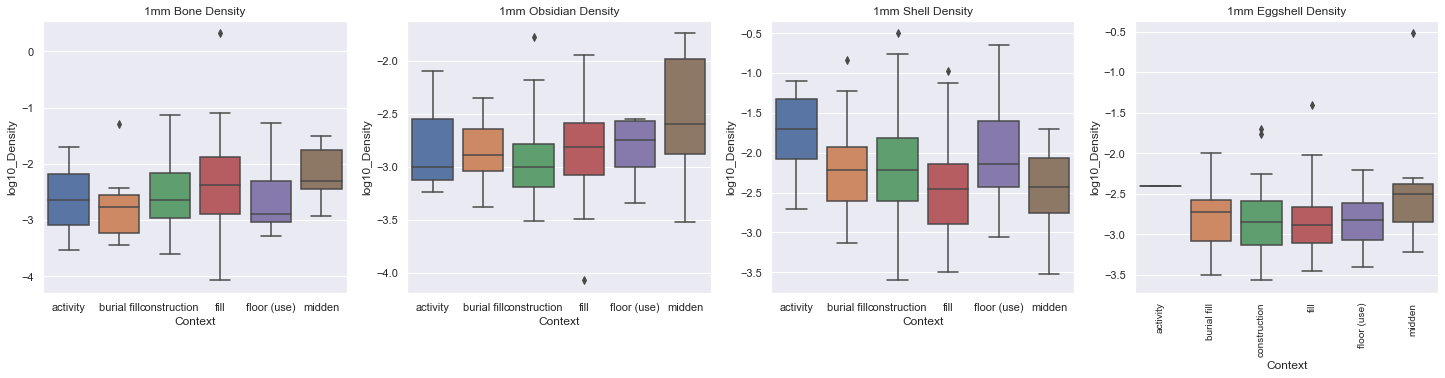

In [75]:
# Plotting densities of 1mm ubiqutous materials

fig, ax = plt.subplots(nrows=1,
                       ncols=4,
                       figsize=(25,5))

sns.boxplot(bone_diagnostic_1.Context, bone_diagnostic_1.log10_Density, ax=ax[0])
plt.xticks(rotation=90, size=10)
ax[0].set_title("1mm Bone Density");

sns.boxplot(obsidian1.Context, obsidian1.log10_Density, ax=ax[1])
ax[1].set_title("1mm Obsidian Density");
plt.xticks(rotation=90, size=10)

sns.boxplot(shell1.Context, shell1.log10_Density, ax=ax[2])
ax[2].set_title("1mm Shell Density");
plt.xticks(rotation=90, size=10)

sns.boxplot(eggshell1.Context, eggshell1.log10_Density, ax=ax[3])
ax[3].set_title("1mm Eggshell Density");



Same thing with 1mm. Middens have the highest density of all 1mm ubiqitous materials except Shell, which is also at the lowest in middens, and the highest in activity deposits. 

2mm and 1mm have simliar distribution: 

both 2 and 1mm bone is high in fills, but relatively low in burial fills. 

2mm and 1mm eggshell shows a lower density in floor deposits than in burial fills, and construction deposits (which was not the case with 4mm eggshell)

Differnece between 2 and 1mm fractions is seen in obsidian. Whereas 2mm obsidian had a high density in activity deposits, density of1mm is at the lowest in htese deposits. The highest in all fractions is seen in middens, but in 1mm fraction, middens are followed by floor deposits and fills. 